# Using build_from_dimensions: 

This notebook demonstrates how to use the `build_from_dimensions` function from the WaterRocketPy library. This approach is **superior** to manually entering rocket dimensions because it automatically calculates all the complex interdependent parameters for you.

## Why build_from_dimensions is Superior

When you manually specify rocket parameters, you need to:
1. **Calculate wall thickness** based on pressure, material, and safety factors
2. **Calculate bottle volume** from geometry
3. **Calculate mass** from material properties and geometry
4. **Calculate drag coefficient** using complex aerodynamic formulas
5. **Calculate surface areas** for reference area
6. **Ensure consistency** between all parameters

The `build_from_dimensions` function does all of this automatically and ensures **physical consistency**!


In [23]:
# Import the required modules
import sys
import numpy as np
from waterrocketpy.rocket.builder import RocketBuilder
from waterrocketpy.core.constants import ATMOSPHERIC_PRESSURE
import matplotlib.pyplot as plt

# Optional ---  import for pandas (prettier table formatting)
# i dont want to force users to install pandas so:
try:
    import pandas as pd
    HAS_PANDAS = True
except ImportError:
    HAS_PANDAS = False
    print("Pandas not available - using simple table formatting")
    print("   To install: pip install waterrocketpy[extra] or pip install pandas")
# End Optimal ---

def format_table(data, headers=None):
    """Format data as a table with or without pandas"""
    if HAS_PANDAS and isinstance(data, dict):
        df = pd.DataFrame(data)
        return df.to_string(index=False)
    else:
        # Simple table formatting without pandas
        if isinstance(data, dict):
            headers = list(data.keys())
            rows = list(zip(*data.values()))
        else:
            rows = data
        
        # Calculate column widths
        if headers:
            col_widths = [len(str(h)) for h in headers]
            for row in rows:
                for i, cell in enumerate(row):
                    col_widths[i] = max(col_widths[i], len(str(cell)))
        else:
            col_widths = [max(len(str(cell)) for cell in row) for row in zip(*rows)]
        
        # Format table
        result = []
        if headers:
            header_row = "  ".join(str(h).ljust(w) for h, w in zip(headers, col_widths))
            result.append(header_row)
            result.append("  ".join("-" * w for w in col_widths))
        
        for row in rows:
            formatted_row = "  ".join(str(cell).ljust(w) for cell, w in zip(row, col_widths))
            result.append(formatted_row)
        
        return "\n".join(result)

print("\nWaterRocketPy build_from_dimensions Example")
print("==========================================")

Pandas not available - using simple table formatting
   To install: pip install waterrocketpy[extra] or pip install pandas

WaterRocketPy build_from_dimensions Example


## Method 1: Manual Parameter Entry (The Hard Way)

First, let's see what happens when you try to build a rocket manually by specifying individual parameters:

In [24]:
# Manual approach - you have to calculate everything yourself!
manual_builder = RocketBuilder()

# You would need to manually calculate:
# - Bottle volume from dimensions
# - Empty mass from material properties
# - Drag coefficient from complex aerodynamics
# - Reference area from geometry
# - Ensure all parameters are consistent

manual_config = (manual_builder
    .set_bottle(volume=0.00138, diameter=0.088)  # Guessed volume!
    .set_nozzle(diameter=0.01)
    .set_mass(empty_mass=0.085, water_fraction=0.3)  # Guessed mass!
    .set_aerodynamics(drag_coefficient=0.5)  # Guessed drag!
    .set_initial_conditions(pressure=8 * ATMOSPHERIC_PRESSURE)
    .set_metadata("Manual Rocket", "Built with manual parameter guessing")
    .build()
)

print("Manual Rocket Configuration:")
print(f"  Volume: {manual_config.bottle_volume:.6f} m³")
print(f"  Empty Mass: {manual_config.empty_mass:.3f} kg")
print(f"  Drag Coefficient: {manual_config.drag_coefficient:.3f}")
print(f"  Description: {manual_config.description}")
print()

Manual Rocket Configuration:
  Volume: 0.001380 m³
  Empty Mass: 0.085 kg
  Drag Coefficient: 0.500
  Description: Built with manual parameter guessing



## Method 2: build_from_dimensions (The Smart Way)

Now let's build the same rocket using `build_from_dimensions`. You just specify the physical dimensions and let the function calculate everything else!

In [25]:
# Smart approach - specify dimensions, let the function calculate everything!
smart_builder = RocketBuilder()

smart_config = (smart_builder
    .build_from_dimensions(
        L_body=0.25,           # 25 cm body length
        L_cone=0.08,           # 8 cm nose cone length  
        d_body=0.088,          # 88 mm diameter (standard 2L bottle)
        p_max=8 * ATMOSPHERIC_PRESSURE,  # 8 bar maximum pressure
        nozzle_diameter=0.01,  # 10 mm nozzle diameter
        material_name="PET",   # PET plastic material
        water_fraction=0.3,    # 30% water fill
        safety_factor=2.0      # 2x safety factor
    )
    .set_metadata("Smart Rocket", "Built using build_from_dimensions")
    .build()
)

print("Smart Rocket Configuration:")
print(f"  Volume: {smart_config.bottle_volume:.6f} m³")
print(f"  Empty Mass: {smart_config.empty_mass:.3f} kg")
print(f"  Drag Coefficient: {smart_config.drag_coefficient:.3f}")
print(f"  Description: {smart_config.description}")
print()

Smart Rocket Configuration:
  Volume: 0.001521 m³
  Empty Mass: 0.175 kg
  Drag Coefficient: 0.239
  Description: Built using build_from_dimensions



## Comparison: Manual vs build_from_dimensions

Let's compare the two approaches and see the differences:

In [26]:
# Create a comparison table
comparison_data = {
    'Parameter': [
        'Bottle Volume (m³)',
        'Empty Mass (kg)', 
        'Drag Coefficient',
        'Reference Area (m²)',
        'Water Mass (kg)',
        'Total Mass (kg)'
    ],
    'Manual Approach': [
        f"{manual_config.bottle_volume:.6f}",
        f"{manual_config.empty_mass:.3f}",
        f"{manual_config.drag_coefficient:.3f}",
        f"{manual_config.reference_area:.6f}",
        f"{manual_config.water_mass:.3f}",
        f"{manual_config.total_mass:.3f}"
    ],
    'build_from_dimensions': [
        f"{smart_config.bottle_volume:.6f}",
        f"{smart_config.empty_mass:.3f}",
        f"{smart_config.drag_coefficient:.3f}",
        f"{smart_config.reference_area:.6f}",
        f"{smart_config.water_mass:.3f}",
        f"{smart_config.total_mass:.3f}"
    ]
}

print("\nComparison of Manual vs build_from_dimensions:")
print("==============================================")
print(format_table(comparison_data))
print()


Comparison of Manual vs build_from_dimensions:
Parameter            Manual Approach  build_from_dimensions
-------------------  ---------------  ---------------------
Bottle Volume (m³)   0.001380         0.001521             
Empty Mass (kg)      0.085            0.175                
Drag Coefficient     0.500            0.239                
Reference Area (m²)  0.007854         0.006082             
Water Mass (kg)      0.414            0.456                
Total Mass (kg)      0.499            0.631                



## Key Advantages of build_from_dimensions

### 1. Automatic Wall Thickness Calculation
The function calculates the required wall thickness based on:
- Maximum pressure
- Material properties (yield strength, etc.)
- Safety factor
- Geometry (diameter)

### 2. Accurate Mass Calculation  
Instead of guessing, it calculates mass from:
- Material density
- Calculated wall thickness
- Actual geometry (body + nose cone)

### 3. Physics-Based Drag Coefficient
Uses real aerodynamic formulas considering:
- Reynolds number
- Friction coefficients (laminar + turbulent)
- Wetted surface area
- Length-to-diameter ratio

### 4. Guaranteed Consistency
All parameters are calculated from the same dimensional inputs, ensuring they're physically consistent with each other.

## Example: Building Different Rocket Configurations

Here I build several rockets with different dimensions to show the flexibility:
Notice, how the 

In [27]:
# Build multiple rocket configurations
rockets = []

# Small rocket (1L bottle equivalent)
small_rocket = (RocketBuilder()
    .build_from_dimensions(
        L_body=0.20, L_cone=0.06, d_body=0.075,
        p_max=6 * ATMOSPHERIC_PRESSURE,
        nozzle_diameter=0.008,
        material_name="PET"
    )
    .set_metadata("Small Rocket", "1L bottle equivalent")
    .build()
)

# Standard rocket (2L bottle equivalent)
standard_rocket = smart_config  # We already built this one

# Large rocket (3L bottle equivalent)
large_rocket = (RocketBuilder()
    .build_from_dimensions(
        L_body=0.35, L_cone=0.12, d_body=0.10,
        p_max=10 * ATMOSPHERIC_PRESSURE,
        nozzle_diameter=0.012,
        material_name="PET",
        water_fraction=0.35
    )
    .set_metadata("Large Rocket", "3L bottle equivalent")
    .build()
)

rockets = [small_rocket, standard_rocket, large_rocket]

# Create comparison
rocket_comparison = {
    'Rocket': ['Small (1L)', 'Standard (2L)', 'Large (3L)'],
    'Volume (L)': [f"{r.bottle_volume * 1000:.1f}" for r in rockets],
    'Empty Mass (g)': [f"{r.empty_mass * 1000:.1f}" for r in rockets],
    'Water Mass (g)': [f"{r.water_mass * 1000:.1f}" for r in rockets],
    'Drag Coefficient': [f"{r.drag_coefficient:.3f}" for r in rockets],
    'Total Mass (g)': [f"{r.total_mass * 1000:.1f}" for r in rockets]
}

print("\nMultiple Rocket Configurations built with build_from_dimensions:")
print("===============================================================")
print(format_table(rocket_comparison))


Multiple Rocket Configurations built with build_from_dimensions:
Rocket         Volume (L)  Empty Mass (g)  Water Mass (g)  Drag Coefficient  Total Mass (g)
-------------  ----------  --------------  --------------  ----------------  --------------
Small (1L)     0.9         89.0            291.6           0.247             380.5         
Standard (2L)  1.5         174.8           456.2           0.239             630.9         
Large (3L)     2.7         355.3           962.1           0.246             1317.4        


## Visualization: Mass Breakdown

Let's visualize how the mass is distributed across different rocket sizes:

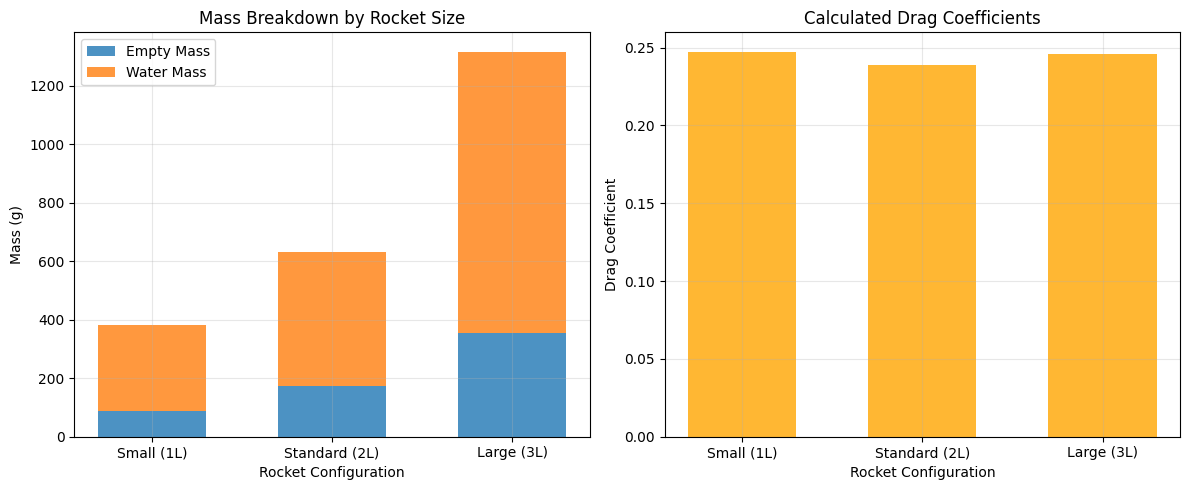

Notice how the drag coefficient changes with rocket size!
This is automatically calculated based on the length-to-diameter ratio.


In [28]:
# Create a stacked bar chart showing mass breakdown
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Mass breakdown
rocket_names = ['Small (1L)', 'Standard (2L)', 'Large (3L)']
empty_masses = [r.empty_mass * 1000 for r in rockets]  # Convert to grams
water_masses = [r.water_mass * 1000 for r in rockets]

x = np.arange(len(rocket_names))
width = 0.6

ax1.bar(x, empty_masses, width, label='Empty Mass', alpha=0.8)
ax1.bar(x, water_masses, width, bottom=empty_masses, label='Water Mass', alpha=0.8)

ax1.set_xlabel('Rocket Configuration')
ax1.set_ylabel('Mass (g)')
ax1.set_title('Mass Breakdown by Rocket Size')
ax1.set_xticks(x)
ax1.set_xticklabels(rocket_names)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Drag coefficient comparison
drag_coeffs = [r.drag_coefficient for r in rockets]

ax2.bar(x, drag_coeffs, width, alpha=0.8, color='orange')
ax2.set_xlabel('Rocket Configuration')
ax2.set_ylabel('Drag Coefficient')
ax2.set_title('Calculated Drag Coefficients')
ax2.set_xticks(x)
ax2.set_xticklabels(rocket_names)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Notice how the drag coefficient changes with rocket size!")
print("This is automatically calculated based on the length-to-diameter ratio.")

## Advanced Example: Material Comparison

The `build_from_dimensions` function can use different materials. Let's compare the same rocket built with different materials:

In [29]:
# Build the same rocket with different materials
materials = ['PET', 'Aluminum', 'Carbon_Fiber']
material_rockets = []

for material in materials:
    try:
        rocket = (RocketBuilder()
            .build_from_dimensions(
                L_body=0.25, L_cone=0.08, d_body=0.088,
                p_max=8 * ATMOSPHERIC_PRESSURE,
                nozzle_diameter=0.01,
                material_name=material,
                water_fraction=0.3
            )
            .set_metadata(f"{material} Rocket", f"Built with {material}")
            .build()
        )
        material_rockets.append(rocket)
    except ValueError as e:
        print(f"Warning: {material} not available in material database: {e}")
        continue

if material_rockets:
    # Compare materials
    material_comparison = {
        'Material': [r.name.split()[0] for r in material_rockets],
        'Empty Mass (g)': [f"{r.empty_mass * 1000:.1f}" for r in material_rockets],
        'Total Mass (g)': [f"{r.total_mass * 1000:.1f}" for r in material_rockets],
        'Volume (L)': [f"{r.bottle_volume * 1000:.1f}" for r in material_rockets]
    }
    
    print("\nMaterial Comparison (same dimensions, different materials):")
    print("=========================================================")
    print(format_table(material_comparison))
    print("\nNotice how different materials result in different masses!")
    print("The function automatically calculates wall thickness based on material strength.")
else:
    print("Only PET material is currently available in the database.")


Material Comparison (same dimensions, different materials):
Material      Empty Mass (g)  Total Mass (g)  Volume (L)
------------  --------------  --------------  ----------
PET           174.8           630.9           1.5       
Aluminum      149.2           605.3           1.5       
Carbon_Fiber  62.1            518.3           1.5       

Notice how different materials result in different masses!
The function automatically calculates wall thickness based on material strength.


## Summary: Why build_from_dimensions is Superior

### **Advantages of build_from_dimensions:**
1. **Automatic calculations** - No need to manually compute complex physics
2. **Physical consistency** - All parameters are derived from the same inputs

### **Best Practice:**
**Always use `build_from_dimensions` when you know the physical dimensions of your rocket.** Only use manual parameter entry for theoretical studies or when working with non-standard configurations that don't fit the dimensional model (might not be phycally realistic).